#**Neurónové siete - dokumentácia projektu**


Marek Krátky,
Martina Hanáková

# Motivácia



V našej práci sme sa rozhodli zamerať na hodnotenie užitočnosti recenzií. Pri nákupe v online obchodoch je častokrát veľmi dôležitý názor na produkt od iných ľudí, ktorí si ho už zakúpili. Tu nám prichádzajú na pomoc recenzie. Nie všetky recenzie sú však relevantné a pomáhajú nám pri rozhodovaní sa o kúpe produktu. Potrebovali by sme preto vedieť, ktoré recenzie užitočné sú a ktoré nie. Jedna možnosť je nechať používateľov označiť recenziu ako užitočnú alebo neužitočnú. Čo keby sme však vedeli predpovedať užitočnosť recenzie len na základe jej obsahu? To je práve úloha, na ktorú by sme sa chceli v tomto projekte zamerať. Pomocou neurónových sietí by sme vedeli  predpovedať, ako veľmi bude daná recenzia užitočná pre ostatných nakupujúcich. 

Vďaka našemu riešeniu by sa vedeli recenzie usporiadavať podľa ich užitočnosti, takže najrelevatnejšie recenzie by sa vždy zobrazili ako prvé. To by napomohlo k zníženiu frustrácie z prehľadávania veľkého množstva recenzií a tým pádom aj k zvýšeniu predaja produktov.

### Otvorené otázky



*   Akú hodnotu pri trénovaní treba priradiť danej informácii?
*   Aké je optimálne množstvo dát pri trénovaní modelu?
*   Ako zachovať čo najväčšiu presnosť modelu pri zmene vstupných dát?



## Súvisiace práce

Po podrobnejšom preskúmaní domény sme zistili, že najčastejším spôsobom ako riešiť tento typ problému je použiť konvolučné neurónové siete, prípadne kombináciu konvolučných a rekurentných neurónových sietí [1,2,4,5]. Z preskúmanej literatúry sme tiež zistili, že existuje množstvo iných modelov a prístupov. V práci Fian Mao a kol. [7] sa zaoberali kombináciou čŕt z textu a metadát o produkte. Použili EG-CNN model, ktorý pracoval so slovnými, znakovými a aspektovými črtami. Snažili sa tiež o prenos informácií medzi rôznymi doménami, keďže pre niektoré domény existuje len málo recenzií, na ktorých sa dal trénovať model. V práci Dong Deng [3] zase skúmali použitie NGMM (neural Gaussian mixture model). Tento model používa paralelnú neurónovú sieť na extrakciu čŕt z dát a zachytáva interakciu medzi používateľmi a produktami. Erion Çano [6] zase uvádza NgramCNN model, ktorý je vhodnejší pre analýzu sentimentu dlhších textov. To síce v našom projekte asi nebude potrebné, ale pre zaujímavosť by sme mohli vyskúšať aj takýto model. Výhodou tohto modelu je, že je presnejší ako podobné plytké konvolučné siete a hlbšie rekurentné siete. Vo svojej práci tiež opisuje predspracovanie textu, z čoho zaujímavé je sústredenie sa na emotikony, ktoré nám vedia prezradiť náladu používateľa.

[1]Dos Santos, Cicero, and Maira Gatti. "Deep convolutional neural networks for sentiment analysis of short texts." Proceedings of COLING 2014, the 25th International Conference on Computational Linguistics: Technical Papers. 2014.

[2]Wang, Xingyou, Weijie Jiang, and Zhiyong Luo. "Combination of convolutional and recurrent neural network for sentiment analysis of short texts." Proceedings of COLING 2016, the 26th international conference on computational linguistics: Technical papers. 2016.

[3]Deng, Dong, et al. "Neural gaussian mixture model for review-based rating prediction." Proceedings of the 12th ACM Conference on Recommender Systems. ACM, 2018.

[4] Abdalraouf Hassan and Ausif Mahmood. Deep Learning approach for sen-timent analysis of short texts.  In2017 3rd International Conference onControl, Automation and Robotics (ICCAR), pages 705–710, Nagoya, Ja-pan, April 2017. IEEE.

[5] Yongcheon Park, Jeongmin Park, Eunkyong Lee, Kyoungchul Lee, and Ji-man Hong. Deep learning based customer product rating prediction model.InProceedings of the 2018 Conference on Research in Adaptive and Con-vergent Systems - RACS ’18, pages 203–204, Honolulu, Hawaii, 2018. ACMPress.

[6] Erion Çano and Maurizio Morisio. A deep learning architecture for sentimentanalysis. InProceedings of the International Conference on Geoinformaticsand Data Analysis - ICGDA ’18, pages 122–126, Prague, Czech Republic,2018. ACM Press

[7] Miao Fan, Chao Feng, Lin Guo, Mingming Sun, and Ping Li.  Product-Aware Helpfulness Prediction of Online Reviews. InThe World Wide WebConference on - WWW ’19, pages 2715–2721, San Francisco, CA, USA,2019. ACM Press.

[8] Zhou, Peng, et al. "Text classification improved by integrating bidirectional LSTM with two-dimensional max pooling." arXiv preprint arXiv:1611.06639 (2016).

## Datasety

### Výber datasetu

Po náhľade do rôznych datasetov sme sa rozhodli vybrať dataset obsahujúci používateľské recenzie na produkty zakúpené z Amazonu, najväčšej e-commerce spoločnosti (slovensky "elektronický obchod"). Zvolili sme si podmnožinu hlavného datasetu zameranú na kancelárske produkty. 

Dataset sme vybrali z množiny nasledujúcich datasetov:
https://cseweb.ucsd.edu/~jmcauley/datasets.html#goodreads

Dataset je možné stiahnuť z nasledujúceho zdroja: http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Office_Products_5.json.gz

Bližšie informácie o datasete ako aj podobné datasety je možné nájsť na nasledujúcom zdroji: http://jmcauley.ucsd.edu/data/amazon/index.html

### Opis datasetu a dát

Dataset obsahuje 53 258 používateľských recenzií. Každá recenzia obsahuje 9 atribútov. 
Dataset je predpripravený tak, aby obsahoval používateľov, ktorí urobili K recenzií a produktov, ktoré boli ohodnotené K krát.
V našom prípade sa K rovná hodnote 5.

Ukážka:
{
  "reviewerID": "A2SUAM1J3GNN3B",
  "asin": "0000013714",
  "reviewerName": "J. McDonald",
  "helpful": [2, 3],
  "reviewText": "I bought this for my husband who plays the piano.  He is having a wonderful time playing these old hymns.  The music  is at times hard to read because we think the book was published for singing from more than playing from.  Great purchase though!",
  "overall": 5.0,
  "summary": "Heavenly Highway Hymns",
  "unixReviewTime": 1252800000,
  "reviewTime": "09 13, 2009"
}

## Návrh vysokoúrovňového riešenia

### Architektúra modelu

Je dôležité zvoliť vhodnú architektúru tak, aby sme docielili tri hlavné ciele:

*   architektúra by mala byť prispôsobená typu a formátu vstupných dát
*   architektúra musí mať dostatočná veľkosť na čo najlepšiu aprofimáciu funkcie záujmu na základe vstupných dát
*   architektúra by nemala byť priveľká, aby natrénovanie modelu netrvalo neadekvátne dlhý čas

V našom projekte sa budeme zaoberať jednoduchými rekurentnými aj konvolučnými modelmi na analýzu textu recenzií a následnú predikciu ich užitočnosti.



# Prieskumná analýza

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import json
import keras
from scipy.stats import linregress as lr



In [0]:
data = pd.read_json('/content/drive/My Drive/app/dataset/Office_Products.json', lines=True)

### Veľkosť datasetu a prvotný pohľad

Náš dataset obsahuje používateľské recenzie na produkty zakúpené z Amazonu. Zvolili sme si podmnožinu hlavného datasetu zameranú na kancelárske produkty. Dataset obsahuje 53258 záznamov (recenzií) a 9 atribútov. 

Medzi najzaujímavejšie atribúty pre nás patrí `helpful`, `reviewText`, `overall` a `summary`. 

In [0]:
len(data.index)

53258

In [0]:
len(data.columns)

9

In [0]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5,"A solid performer, and long time friend",1094169600,"09 3, 2004"
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007"
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011"
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5,One of the last of an almost extinct species,1145404800,"04 19, 2006"
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5,Still the best,1375574400,"08 4, 2013"


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53258 entries, 0 to 53257
Data columns (total 9 columns):
reviewerID        53258 non-null object
asin              53258 non-null object
reviewerName      52799 non-null object
helpful           53258 non-null object
reviewText        53258 non-null object
overall           53258 non-null int64
summary           53258 non-null object
unixReviewTime    53258 non-null int64
reviewTime        53258 non-null object
dtypes: int64(2), object(7)
memory usage: 3.7+ MB


### reviewerID

Unikátny identifikátor používateľa, ktorý recenziu napísal.

In [0]:
len(data.reviewerID.unique())

4905

In [0]:
data.reviewerID.value_counts()

A3OXHLG6DIBRW8    94
A22I55P15NSAOX    81
A1Z16630QMH8Q6    77
A22CW0ZHY3NJH8    76
A1ODOGXEYECQQ8    76
                  ..
A1U0131NE06V15     5
A2Z5JKDIEZF57Q     5
A2IZW51037PEWJ     5
AP1QSII669BCQ      5
AFDT9VMWE601S      5
Name: reviewerID, Length: 4905, dtype: int64

Dataset obsahuje používateľov, ktorí hodnotili 5 až 94 produktov.

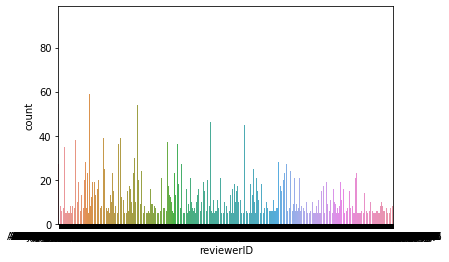

In [0]:
sb.countplot(x='reviewerID', data=data)


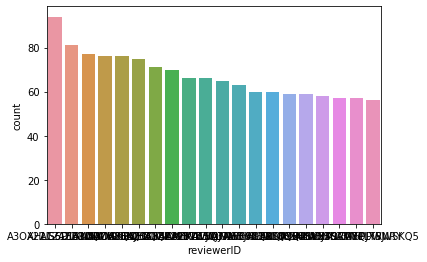

In [0]:
sb.countplot(x='reviewerID', data=data, order=data.reviewerID.value_counts().iloc[:20].index)
# top 20 reviewerov podla poctu recenzii

### asin

Unikátny identifikátor produktu, ktorý je v recenzii hodnotený.

In [0]:
len(data.asin.unique())

2420

In [0]:
data.asin.value_counts()

B0010T3QT2    311
B0039N7ELS    227
B0027CTFBO    205
B0039N3QFQ    186
B002K9M6OW    185
             ... 
B0006IEV60      5
B00006JN7R      5
B00347A8PS      5
B000087L7C      5
B006M1MFEA      5
Name: asin, Length: 2420, dtype: int64

Dataset obsahuje produkty, ktoré boli hodnotené od 5 do 311 používateľmi.

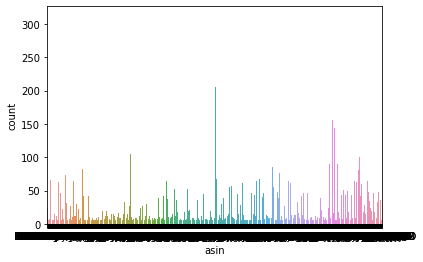

In [0]:
sb.countplot(x='asin', data=data)

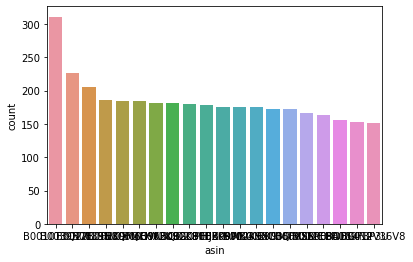

In [0]:
sb.countplot(x='asin', data=data, order=data.asin.value_counts().iloc[:20].index)
# top 20 produktov podla poctu recenzii

### reviewerName

Meno, pod ktorým sa používateľ, ktorý napísal recenziu prezentuje. Nemusí byť unikátne.

In [0]:
len(data.reviewerName.unique())

4800

In [0]:
data.reviewerName.value_counts()

Amazon Customer                     411
C. Hill "CFH"                        93
Two kids mom "scienceteachermom"     81
Ed                                   78
Noname                               76
                                   ... 
N Smiley                              1
Vicky "sports girl"                   1
Elizabeth Mack                        1
Evil Von Der Scratchy                 1
Kdrama Addict                         1
Name: reviewerName, Length: 4799, dtype: int64

### helpful

Atribút, ktorý poskytuje agregované informácie o o subjektívnom vnímaní užitočnosti recenzie pre ďalších používateľov. 
Formát - [P,N] kde:

*   P = počet pozitívnych hodnotení (používatelia považovali recenziu za užitočnú)

*   N = počet negatívnych hodnotení (používatelia považovali recenziu za neužitočnú)




Keďže chceme hodnoty z tohto atribútu použiť na trénovanie nášho modelu, potrebujeme ich extrahovať do dvoch oddelených atribútov obsahujúcich len dané hodnoty.




In [0]:
data.helpful.head(5)

0    [3, 4]
1    [7, 9]
2    [3, 3]
3    [7, 8]
4    [0, 0]
Name: helpful, dtype: object

In [0]:
data['helpful'] = data['helpful'].astype(str) 
# chceme vykonavat str.replace a str.split metody

In [0]:
#odstranime nezelane znaky
data['helpful'] = pd.DataFrame(data['helpful'].str.replace('[', ''))
data['helpful'] = pd.DataFrame(data['helpful'].str.replace(']', ''))
data['helpful'] = pd.DataFrame(data['helpful'].str.replace(' ', ''))



data.helpful.head(5)

0    3,4
1    7,9
2    3,3
3    7,8
4    0,0
Name: helpful, dtype: object

In [0]:
# rozdelime si hodnotenia do dvoch atributov (pozitivne a negativne)
data['helpful_positive'], data['helpful_negative'] = data['helpful'].str.split(",").str


In [0]:
data['helpful_positive'].head(5)


0    3
1    7
2    3
3    7
4    0
Name: helpful_positive, dtype: object

In [0]:
data['helpful_negative'].head(5)

0    4
1    9
2    3
3    8
4    0
Name: helpful_negative, dtype: object

In [0]:
# rozdelenie prebehlo uspesne, mozeme odstranit povodny atribut
del data['helpful']

### summary

Tento atribút obsahuje stručnú verziu (zhrnutie) vyjadrenia klienta o danom produkte.

In [0]:
# Tokenizacia - zaujima nas pocet slov v recenziach
summaryTokens = [keras.preprocessing.text.text_to_word_sequence(text, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ') for text in data.summary]


In [0]:
summaryTokens[:5]

[['a', 'solid', 'performer', 'and', 'long', 'time', 'friend'],
 ['price',
  'of',
  'gold',
  'is',
  'up',
  'so',
  "don't",
  'bury',
  'the',
  'golden',
  'flagship',
  'hp12c'],
 ['good', 'functionality', 'but', 'not', 'durable', 'like', 'old', 'hps'],
 ['one', 'of', 'the', 'last', 'of', 'an', 'almost', 'extinct', 'species'],
 ['still', 'the', 'best']]

In [0]:
# ulozenie poctov slov recenzii kvoli analyze a vizualizacii
for i,review in enumerate(summaryTokens):
  summaryTokens[i] = len(review)


In [0]:
# kontrola
summaryTokens[:5]

[7, 12, 8, 9, 3]

In [0]:
min(summaryTokens)

0

In [0]:
max(summaryTokens)

32

Zhrnutia recenzií dosahujú dĺžku 0 až 32 slov.

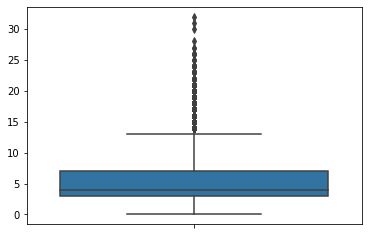

In [0]:
sb.boxplot(y=summaryTokens)

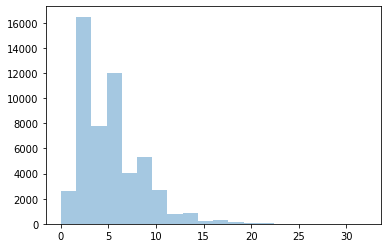

In [0]:
sb.distplot( summaryTokens, bins=20, kde=False )
# os Y - pocet recenzií
# os X - pocet slov v recenzii

### reviewText

Tento atribút obsahuje celé vyjadrenie klienta o produkte.

In [0]:
reviewTextTokens = [keras.preprocessing.text.text_to_word_sequence(text, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ') for text in data.reviewText]

In [0]:
for i,review in enumerate(reviewTextTokens):
  reviewTextTokens[i] = len(review)

In [0]:
reviewTextTokens[:5]

[191, 928, 96, 624, 124]

In [0]:
max(reviewTextTokens)

5627

In [0]:
min(reviewTextTokens)

0

Recenzie dosahujú dĺžku 0 až 5627 slov.

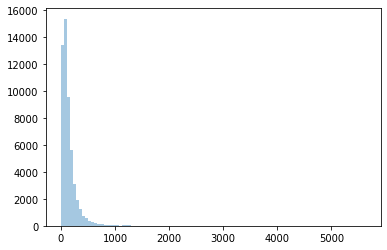

In [0]:
sb.distplot( reviewTextTokens, bins=100, kde=False )
# os Y - pocet recenzií
# os X - pocet slov v recenzii

## overall

Tento atribút reprezentuje agregované hodnotenie daného produktu - hodnotenia všetkých aspektov daného produktu, ktoré používateľ ohodnotil, boli sčítané a následne vydelené počtom hodnotených aspektov.

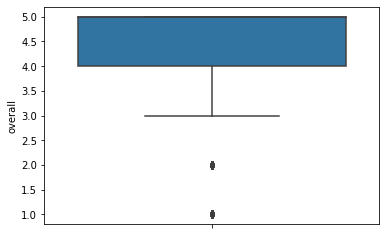

In [0]:
sb.boxplot(y="overall", data=data)

In [0]:
data.to_json('/content/drive/My Drive/app/dataset/Office_Products_updated.json')

## Korelácie

Vytvoríme si subset obsahujúci všetky atribúty, ktoré považujeme za potenciálne relevantné v rámci analýzy korelácií.

In [0]:
dataCorSubset = pd.DataFrame(list(zip(reviewTextTokens, summaryTokens)), columns =['reviewTextSize', 'summarySize'])
dataCorSubset.head(5)

,reviewTextSize,summarySize
0,191,7
1,928,12
2,96,8
3,624,9
4,124,3


In [0]:
dataCorSubset['helpful_positive'], dataCorSubset['helpful_negative'] = data['helpful_positive'], data['helpful_negative'] 
dataCorSubset.head(5)

,reviewTextSize,summarySize,helpful_positive,helpful_negative
0,191,7,3,4
1,928,12,7,9
2,96,8,3,3
3,624,9,7,8
4,124,3,0,0


In [0]:
dataCorSubset.helpful_positive = dataCorSubset.helpful_positive.astype(int)
dataCorSubset.helpful_negative = dataCorSubset.helpful_negative.astype(int)

In [0]:
dataCorSubset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53258 entries, 0 to 53257
Data columns (total 4 columns):
reviewTextSize      53258 non-null int64
summarySize         53258 non-null int64
helpful_positive    53258 non-null int64
helpful_negative    53258 non-null int64
dtypes: int64(4)
memory usage: 1.6 MB


In [0]:
# vypis matice korelacii
cor = dataCorSubset.corr()
cor.style.background_gradient(cmap='coolwarm')

,reviewTextSize,summarySize,helpful_positive,helpful_negative
reviewTextSize,1,0.284475,0.279407,0.283687
summarySize,0.284475,1,0.04797,0.049459
helpful_positive,0.279407,0.04797,1,0.998512
helpful_negative,0.283687,0.049459,0.998512,1


Ako môžeme pozorovať z matice korelácií, okrem očividnej korelácie medzi počtom pozitívnych a negatívnych hodnotení recenzie stojí za zmienku jedine fakt, že celý text recenzie má výrazne vyššiu koreláciu s počtom pozitívnych a negatívnych hodnotení recenzie než jej skrátená verzia.

Pearson correlation: 0.279


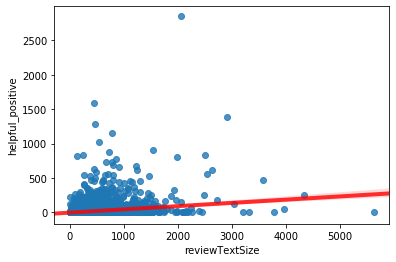

In [0]:
sb.regplot(x=dataCorSubset.reviewTextSize, y=dataCorSubset.helpful_positive, line_kws={"color":"r","alpha":0.8,"lw":4})
print("Pearson correlation: %.3f" % dataCorSubset.reviewTextSize.corr(dataCorSubset.helpful_positive))

Pearson correlation: 0.048


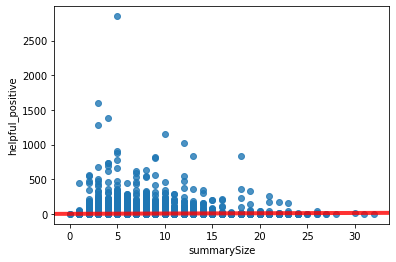

In [0]:
sb.regplot(x=dataCorSubset.summarySize, y=dataCorSubset.helpful_positive, line_kws={"color":"r","alpha":0.8,"lw":4})
print("Pearson correlation: %.3f" % dataCorSubset.summarySize.corr(dataCorSubset.helpful_positive))

# Predspracovanie dát

Pred samotným trénovaním modelu bolo potrebné si získané dáta predspracovať. Samotný text sme zbavili rôznych tagov a interpunkčných znakov. Následne sme ho rozdelili na jednotlivé slová. 

Z každého hodnotenia sme zobrali prvých 256 slov, aby neboli príliš dlhé. V prípade, že bolo nejaké hodnotenie kratšie, tak sme ho doplnili nulami.

Z množiny trénovacích slov sme si vytvorili slovník 1000 najčajstejšie sa vyskytujúcich slov a ten sme používali pri trénovaní. 

Užitočnosť daných hodnotení, ktorú sme mali zadanú vo forme počet "Upvote" a počet "Downvote", sme rozdelili a každú užitočnosť sme zaradili do jednej z troch kategórií. 

Tieto kategórie sú:
- viac pozitívnych reakcií ako negatívnych reakcií
- viac negatívnych reakcií ako pozitívnych reakcií
- počet pozitívnych a negatívnych rekacií je vyrovnaný

Všetky dáta sme rozdelili na trénovaciu a testovaciu množinu v pomere 80:20. Toto rozdelenie sme spravili pred vytváraním slovníka

# Predtrénovaný embedding

Vo všetkých našich modeloch okrem toho úplne základného sme použili v embedding vrstve predtrénovaný embedding GloVe. Konkrétne sme použili verziu so 100 dimenziami.

# Architektúra modelov

všetky naše modely sa nachádzajú na https://github.com/martinahanakova/nsiete-hanakova-kratky/tree/master/models 

## Konvolučné siete

Ako prvý z modelov sme použili model zložený zo vstupnej embedding vrstvy nasledovanej striedavo ôsmimi konvolučnými a maxpooling vrstvami. Pri všetkých vrstvách sme použili 128 filtrov, kernel_size 3, padding same a ako aktivačnú funkciu sme použili relu.

Použili sme tiež L1 a L2 regularizáciu a dropout vrstvy.

## LSTM siete

Ako ďalší model sme vyskúšali dvojvrstvovú obojsmernú LSTM sieť. Rovnako sme použli vstupnú embedding vrstvu a droupout vrstvy. Opäť sme tiež použili L1 a L2 regularizáciu.


## Kombinovaný model

Ako posledné sme vyskúšali model, v ktorom sme skombinovali LSTM vtsvy s konvolučnými vrstvami. Inšpiráciu pre tento model sme čerpali z článku Peng Zhou a kolektív [8]. Tento model sme ešte mierne upravili a nakoniec sme použili vstupnú embedding vrstvu nasledovanú jednou obojsmernou LSTM vrstvou so 64 jednotkami. Za ňou nasledovali striedavo dve konvolučné a maxpooling vrstvy. 

Opäť sme použili L1, L2 regularizáciu a dropout vrstvy.


# Trénovanie

### Hardvér

Trénovanie sme uskutočnili lokálne na vlastných zariadeniach. Aj keď sme si GCP prostredie pripravili, po uskutočnení prvých lokálnych testov sme spozorovali, že vzhľadom na veľkosť datasetu a komplexitu modelov nie je nutné GCP využiť. 

### prostredie


*   Využili sme platformu Tensorflow spolu s Keras API kvôli jednoduchému použitiu a prehľadným výsledkom.


*   Modely sme trénovali spustením súboru *train.py* v príkazovom riadku. 





### Hyperparametre

Tieto parametre boli aplikované na akýkoľvek model, ktorý bol aktuálne aktívny v súbore *train.py*.

Jedná sa o nasledovné parametre:
* epochs - obvykle 10
* batch_size - 32, 64 alebo 128
* learning_rate - 0.001 alebo 0.0001
* regularization - 0, 0.0001 alebo 0.00001
* dropout - vždy 0.2 

Pri trénovaní našich modelov sme skúšali rôzne kombinácie hodnôt daných parametrov za účelom porovnania úspešností modelov.

Uvedené hodnoty parametrov sme obvykle použili kvôli tomu, že sme ich po prečítaní literatúry k danej doméne považovali za vhodné oporné body pri experimentoch s parametrami. 

Batch_size hodnoty boli stanovené na základe konvencií.

# Experiment, Analýza výsledkov, zhrnutie

V rámci experimentu sme trénovali naše modely na analýzu sentimentu recenzií. Modely mali za úlohu určiť z obsahu recenzie, či má:

1. viac pozitívnych hodnotení
2. viac negatívnych hodnotení
3. rovnako pozitívnych a negatívnych recenzií

Pri trénovaní sme použili rôzne hodnoty hyperparametrov a následne sme porovnávali úspešnosť modelov.
Výsledky trénovania a predikcií sme si priebežne logovali. (názov priečinku logov z jedného trénovania obsahuje vo svojom názve typ modelu a použité názvy a hodnoty hyperparametrov)



### Úspešnosť modelov

#### Baseline

ACC:

![alt text](https://drive.google.com/uc?id=1QpUdRzZeOB7gaqNlDTG7BYDar2HCcIie)

LOSS:

![alt text](https://drive.google.com/uc?id=1nNv22bM98HfNYZlBCKKXNMlC5b1U2lP1)

Ako môžeme pozorovať, Baseline model, ktorý mal viac epoch a väčší learning rate sa pretrénoval.

#### CNN

ACC:

![alt text](https://drive.google.com/uc?id=1O1oi5oEZPw5TBu9RywU8xNmZiHj2Svm_)

BEST ACC:

![alt text](https://drive.google.com/uc?id=17mXOwKgA8FjkRw_BtDens3T-nNT400Q9)

LOSS:

![alt text](https://drive.google.com/uc?id=1fwKMoJZaNvsZjE8KcX-TURBO4Q6ZePFv)

Ako môžeme pozorovať, v šiestom epochu začalo dochádzať k pretrénovaniu

#### BiLSTM

ACC:

![alt text](https://drive.google.com/uc?id=1nZAfcpHm8SuoEpuYE4LPYeIf3t1xUoDp)

LOSS:

![alt text](https://drive.google.com/uc?id=1KkcgdYB11wnlRSAF6S3i8_qnuKmv36cX)

### Kombinovaný model

ACC:

![alt text](https://drive.google.com/uc?id=1qii7Bp6nkrZJ87XWca_9YEWlWUM9UXeP)

LOSS:

![alt text](https://drive.google.com/uc?id=1SzJQ0zZuOZLsLdLYR5q3NQS4lfYSQJui)

### Najlepší a najhorší výsledok

![bestVSworst_accuracy](https://drive.google.com/uc?id=1OkLMM_L9ZJrhrtptpszgraWGcAGpgKiq)

# Ďalšia práca

V rámci tohto projektu sme ani zďaleko nestihli všetko, čo by sme chceli, respektíve mohli vyskúšať. 

V prípadnom pokračovaní na tejto práci by sme chceli vyskúšať rôzne veľkosti slovníka a tiež vstupného počtu slov.

Ďalej sme nestihli spraviť porovnanie s predtrénovaným embeddingom a bez neho, čo by mohlo byť tiež zaujímavé.

Tiež by sme vyskúšali omnoho väčšie množstvo hyperparametrov. 

Ďalšou možnosťou by bolo trénovanie modelov najskôr na menšom množstve dát, aby sme rýchlejšie videli, nakoľko je model schopný. Tento prístup sme si uvedomili až trochu neskôr, na čo sme možno aj doplatili, lebo by sme inak stihli vyskúšať väčšie množstvo kombinácii parametrov.

Tiež sa nám viackrát stalo, že sa model po určitom počte epoch začal pretrénovavať, vtedy by bolo dobré trénovanie zastaviť a skúsiť teda aj iné množstvo epoch ako 10, ktoré sme štandardne používali.